# Визуализация документов c $\tau$-SNE
[ссылки]

In [1]:
%env MKL_DYNAMIC=FALSE
%env MKL_NUM_THREADS=8

env: MKL_DYNAMIC=FALSE
env: MKL_NUM_THREADS=8


In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import time

import gensim
from gensim.models.doc2vec import Doc2Vec

# For data manipulating
import random
import pickle
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD

# Visualization
pd.options.display.max_colwidth = 100
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from MulticoreTSNE import MulticoreTSNE as TSNE
import matplotlib
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
rc={"lines.linewidth": 2.5})

%matplotlib inline

In [3]:
def pickling_data(name, data):
    out = open(name + '.pkl', 'wb')
    pickle.dump(data, out)
    out.close()
    
def load_data(name):
    pkl_file = open(name, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    return data

## Данные

In [4]:
path_to_d2v = '/home/kulesh271828/arxiv/models/doc2vec/'

model_dbow = Doc2Vec.load(path_to_d2v + 'dbow_300_col.model')
model_dm = Doc2Vec.load(path_to_d2v + 'dm_300_col.model')

X_dbow = model_dbow.docvecs.doctag_syn0
X_dm = model_dm.docvecs.doctag_syn0
X = np.hstack((X_dbow, X_dm))
X.shape

(163075, 600)

## "Мягкое" понижение размерности методом главных компонент

In [23]:
svd = TruncatedSVD(n_components=100, n_iter=20, random_state=0)
svd.fit(X)

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=20,
       random_state=0, tol=0.0)

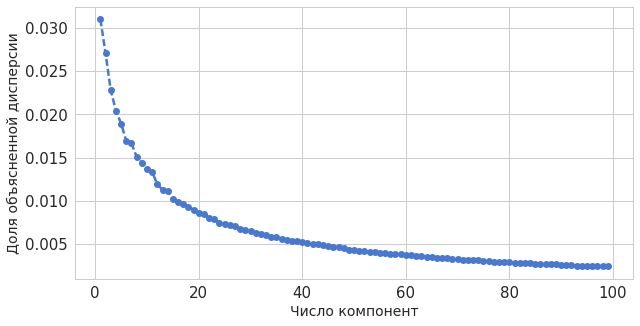

In [27]:
plt.figure(figsize=(10,5))
plt.plot(range(1,100), np.array(svd.explained_variance_ratio_[1:]), 'o--')
plt.xlabel('Число компонент', fontsize=14)
plt.ylabel('Доля объясненной дисперсии', fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [34]:
svd.explained_variance_ratio_.cumsum()[:70][-1]

0.55721843549991612

##### N = 70

In [4]:
svd = TruncatedSVD(n_components=70, n_iter=40, random_state=0)
X_svd = svd.fit_transform(X_dbow)
X_svd.shape

(163075, 70)

## 26 классов

In [7]:
path_to_tsne = '/home/kulesh271828/arxiv/models/tsne/' 
#y = pd.read_csv('target_d2v.csv').reset_index(drop=True)
y = pd.read_csv('target_d2v.csv')['primary_category']
y.reset_index(drop=True, inplace=True)

In [20]:
%%time

print('Transforming...')
tsne = TSNE(n_jobs=8, random_state=0, verbose=2, n_iter=2000, perplexity=20)
X_tsne = tsne.fit_transform(X_svd)

Transforming...
CPU times: user 2h 15min 32s, sys: 4min 15s, total: 2h 19min 48s
Wall time: 30min 49s


Saving

In [35]:
pickling_data('X_tsne_perplexity-20', X_tsne)

Demonstration

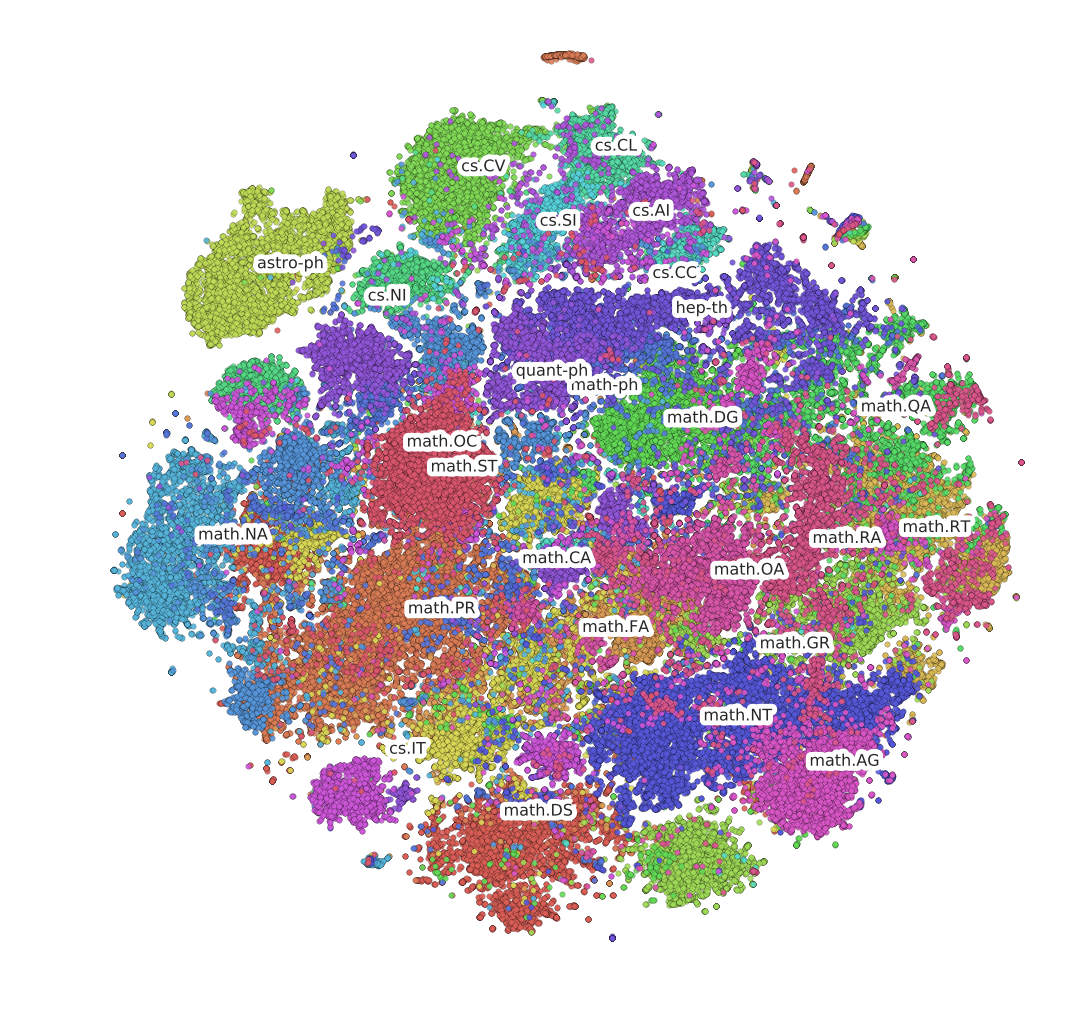

In [31]:
plt.figure(figsize=(18,18))
txts = []
palette = np.array(sns.color_palette("hls", 26))

for category, c in zip(y.unique(), palette):
    mask = y[y == category].index
    plt.scatter(X_tsne[mask][:,0], X_tsne[mask][:,1], alpha=0.9, color=c, label=category, lw=0.2, s=30, edgecolor="black")
    plt.xlabel("PC 1", size=16)
    plt.ylabel("PC 2", size=16)
    xtext, ytext = np.median(X_tsne[mask], axis=0)
    txt = plt.text(xtext, ytext, category, fontsize=16)
    txt.set_path_effects([
            PathEffects.Stroke(linewidth=10, foreground="w"),
            PathEffects.Normal()])
    txts.append(txt)
    plt.axis('off')
    plt.axis('tight')
    
plt.show()

## 5 классов, perplexity=5

In [38]:
%%time

print('Transforming...')
tsne = TSNE(n_jobs=8, random_state=0, verbose=2, n_iter=2000, perplexity=5)
X_tsne = tsne.fit_transform(X_svd)

Transforming...
CPU times: user 2h 3min 43s, sys: 4min 17s, total: 2h 8min
Wall time: 26min 53s


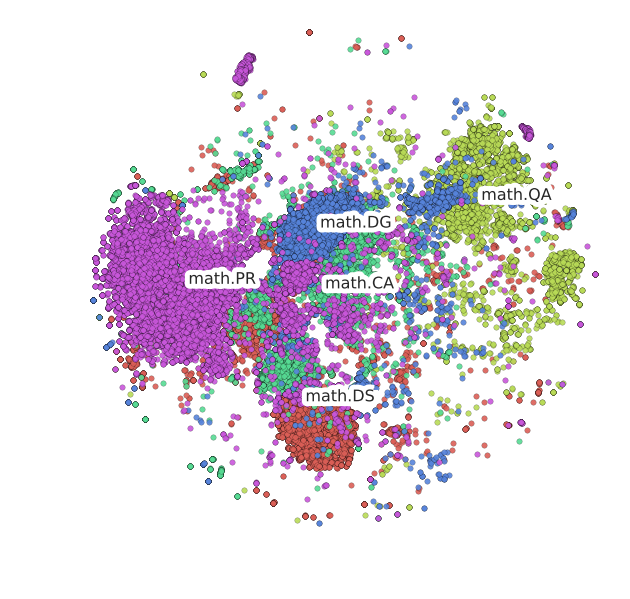

In [40]:
plt.figure(figsize=(10,10))
txts = []
palette = np.array(sns.color_palette("hls", 5))

classes = ['math.DS','math.QA', 'math.CA', 'math.DG', 'math.PR']
for category, c in zip(classes, palette):
    mask = y[y == category].index
    plt.scatter(X_tsne[mask][:,0], X_tsne[mask][:,1], alpha=0.9, color=c, label=category, lw=0.2, s=30, edgecolor="black")
    plt.xlabel("PC 1", size=16)
    plt.ylabel("PC 2", size=16)
    xtext, ytext = np.median(X_tsne[mask], axis=0)
    txt = plt.text(xtext, ytext, category, fontsize=16)
    txt.set_path_effects([
            PathEffects.Stroke(linewidth=10, foreground="w"),
            PathEffects.Normal()])
    txts.append(txt)
    plt.axis('off')
    plt.axis('tight')
    
plt.show()

## 5 классов, perplexity=20

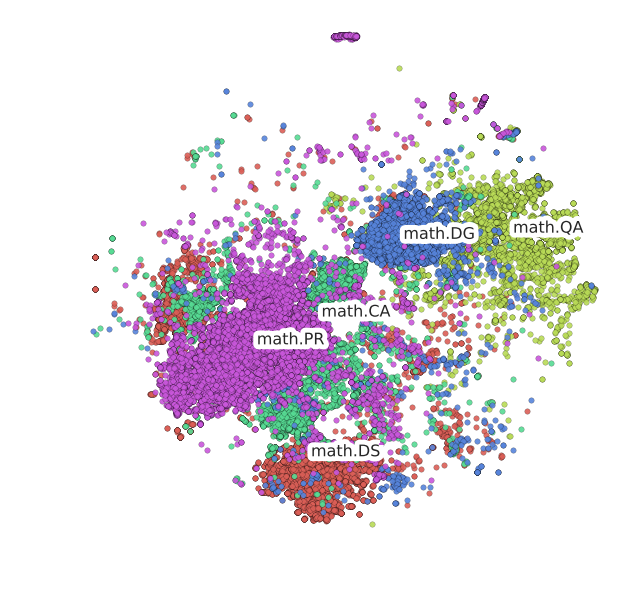

In [33]:
plt.figure(figsize=(10,10))
txts = []
palette = np.array(sns.color_palette("hls", 5))

classes = ['math.DS','math.QA', 'math.CA', 'math.DG', 'math.PR']
for category, c in zip(classes, palette):
    mask = y[y == category].index
    plt.scatter(X_tsne[mask][:,0], X_tsne[mask][:,1], alpha=0.9, color=c, label=category, lw=0.2, s=30, edgecolor="black")
    plt.xlabel("PC 1", size=16)
    plt.ylabel("PC 2", size=16)
    xtext, ytext = np.median(X_tsne[mask], axis=0)
    txt = plt.text(xtext, ytext, category, fontsize=16)
    txt.set_path_effects([
            PathEffects.Stroke(linewidth=10, foreground="w"),
            PathEffects.Normal()])
    txts.append(txt)
    plt.axis('off')
    plt.axis('tight')
    
plt.show()

## 5 классов, perplexity=50

In [36]:
%%time

print('Transforming...')
tsne = TSNE(n_jobs=8, random_state=0, verbose=2, n_iter=2000, perplexity=50)
X_tsne = tsne.fit_transform(X_svd)

Transforming...
CPU times: user 2h 29min 56s, sys: 3min 46s, total: 2h 33min 42s
Wall time: 38min 25s


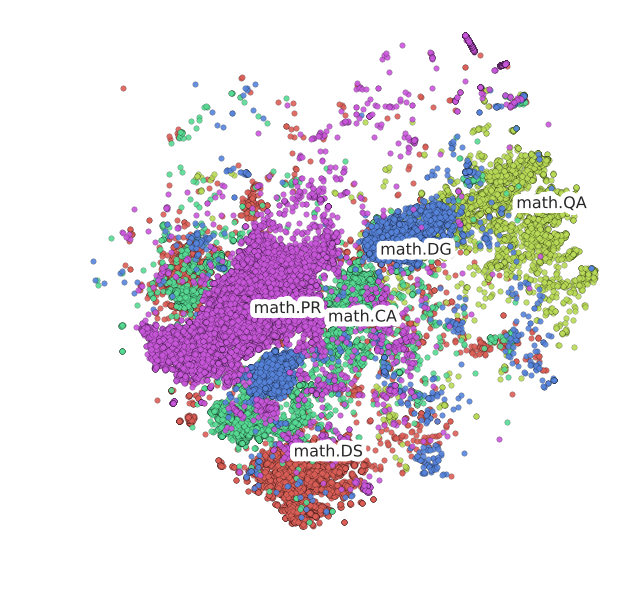

In [37]:
plt.figure(figsize=(10,10))
txts = []
palette = np.array(sns.color_palette("hls", 5))

classes = ['math.DS','math.QA', 'math.CA', 'math.DG', 'math.PR']
for category, c in zip(classes, palette):
    mask = y[y == category].index
    plt.scatter(X_tsne[mask][:,0], X_tsne[mask][:,1], alpha=0.9, color=c, label=category, lw=0.2, s=30, edgecolor="black")
    plt.xlabel("PC 1", size=16)
    plt.ylabel("PC 2", size=16)
    xtext, ytext = np.median(X_tsne[mask], axis=0)
    txt = plt.text(xtext, ytext, category, fontsize=16)
    txt.set_path_effects([
            PathEffects.Stroke(linewidth=10, foreground="w"),
            PathEffects.Normal()])
    txts.append(txt)
    plt.axis('off')
    plt.axis('tight')
    
plt.show()

## 5 классов, perplexity=100

In [42]:
%%time

print('Transforming...')
tsne = TSNE(n_jobs=8, random_state=0, verbose=2, n_iter=2000, perplexity=100)
X_tsne = tsne.fit_transform(X_svd)

Transforming...
CPU times: user 2h 45min 9s, sys: 1min 48s, total: 2h 46min 58s
Wall time: 1h 4min 28s


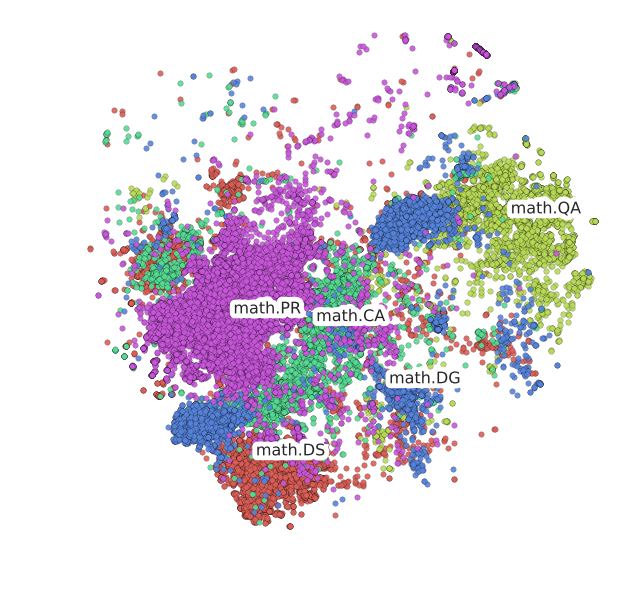

In [43]:
plt.figure(figsize=(10,10))
txts = []
palette = np.array(sns.color_palette("hls", 5))

classes = ['math.DS','math.QA', 'math.CA', 'math.DG', 'math.PR']
for category, c in zip(classes, palette):
    mask = y[y == category].index
    plt.scatter(X_tsne[mask][:,0], X_tsne[mask][:,1], alpha=0.9, color=c, label=category, lw=0.2, s=30, edgecolor="black")
    plt.xlabel("PC 1", size=16)
    plt.ylabel("PC 2", size=16)
    xtext, ytext = np.median(X_tsne[mask], axis=0)
    txt = plt.text(xtext, ytext, category, fontsize=16)
    txt.set_path_effects([
            PathEffects.Stroke(linewidth=10, foreground="w"),
            PathEffects.Normal()])
    txts.append(txt)
    plt.axis('off')
    plt.axis('tight')
    
plt.show()

## PCA vs. $\tau$-SNE

In [6]:
svd = TruncatedSVD(n_components=70, n_iter=40, random_state=0)
X_svd = svd.fit_transform(X_dbow)
X_svd.shape

(163075, 70)

In [8]:
%%time

print('Transforming...')
tsne = TSNE(n_jobs=8, random_state=0, verbose=2, n_iter=2000, perplexity=20)
X_tsne = tsne.fit_transform(X_svd)

Transforming...
CPU times: user 2h 7min 18s, sys: 2min 25s, total: 2h 9min 44s
Wall time: 24min 24s


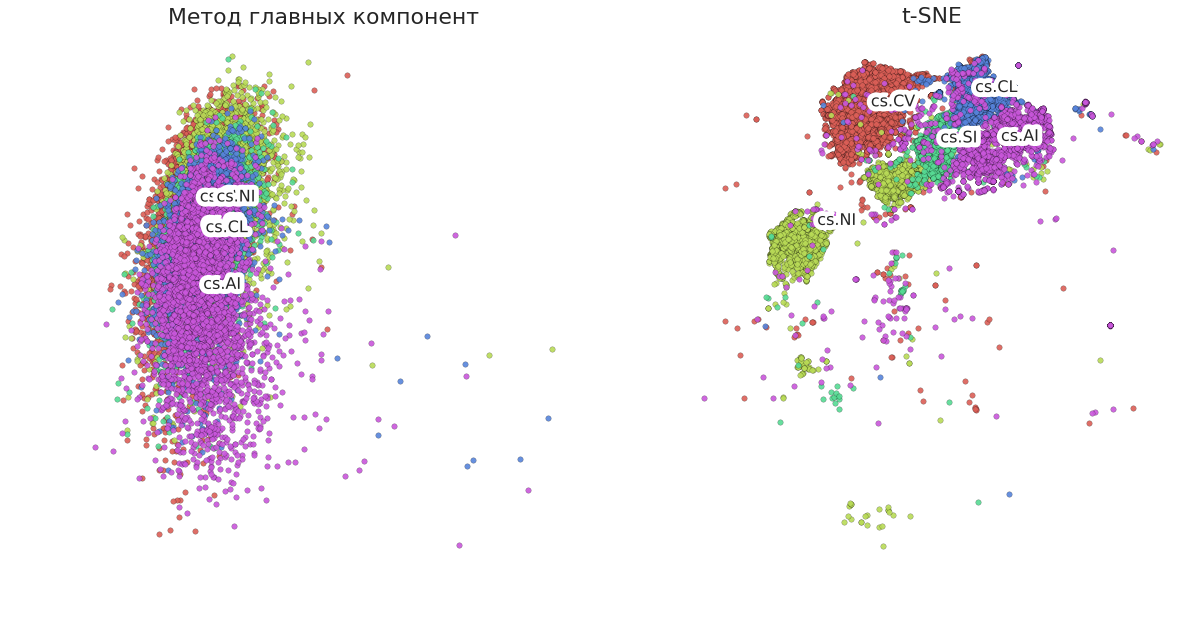

In [16]:
plt.figure(figsize=(20,10))
txts = []
palette = np.array(sns.color_palette("hls", 5))

classes = ['cs.CV','cs.NI', 'cs.SI', 'cs.CL', 'cs.AI']

plt.subplot(1,2,1)
for category, c in zip(classes, palette):
    mask = y[y == category].index
    plt.scatter(X_svd[:,:2][mask][:,0], X_svd[:,:2][mask][:,1], alpha=0.9, color=c, label=category, lw=0.2, s=30, edgecolor="black")
    plt.xlabel("PC 1", size=16)
    plt.ylabel("PC 2", size=16)
    xtext, ytext = np.median(X_svd[:,:2][mask], axis=0)
    txt = plt.text(xtext, ytext, category, fontsize=16)
    txt.set_path_effects([
            PathEffects.Stroke(linewidth=10, foreground="w"),
            PathEffects.Normal()])
    txts.append(txt)
    plt.title("Метод главных компонент", fontsize=22)
    plt.axis('off')
    plt.axis('tight')
    
plt.subplot(1,2,2)
for category, c in zip(classes, palette):
    mask = y[y == category].index
    plt.scatter(X_tsne[mask][:,0], X_tsne[mask][:,1], alpha=0.9, color=c, label=category, lw=0.2, s=30, edgecolor="black")
    plt.xlabel("PC 1", size=16)
    plt.ylabel("PC 2", size=16)
    xtext, ytext = np.median(X_tsne[mask], axis=0)
    txt = plt.text(xtext, ytext, category, fontsize=16)
    txt.set_path_effects([
            PathEffects.Stroke(linewidth=10, foreground="w"),
            PathEffects.Normal()])
    txts.append(txt)
    plt.axis('off')
    plt.axis('tight')
    plt.title("t-SNE", fontsize=22)
    
plt.show()

## Анимация сходимости алгоритма
[ссылка]

In [ ]:
# This list will contain the positions of the map points at every iteration.
positions = []
def _gradient_descent(objective, p0, it, n_iter, n_iter_without_progress=30,
                      momentum=0.5, learning_rate=1000.0, min_gain=0.01,
                      min_grad_norm=1e-7, min_error_diff=1e-7, verbose=0,
                      args=[]):
    # The documentation of this function can be found in scikit-learn's code.
    p = p0.copy().ravel()
    update = np.zeros_like(p)
    gains = np.ones_like(p)
    error = np.finfo(np.float).max
    best_error = np.finfo(np.float).max
    best_iter = 0

    for i in range(it, n_iter):
        # We save the current position.
        positions.append(p.copy())

        new_error, grad = objective(p, *args)
        error_diff = np.abs(new_error - error)
        error = new_error
        grad_norm = linalg.norm(grad)

        if error < best_error:
            best_error = error
            best_iter = i
        elif i - best_iter > n_iter_without_progress:
            break
        if min_grad_norm >= grad_norm:
            break
        if min_error_diff >= error_diff:
            break

        inc = update * grad >= 0.0
        dec = np.invert(inc)
        gains[inc] += 0.05
        gains[dec] *= 0.95
        np.clip(gains, min_gain, np.inf)
        grad *= gains
        update = momentum * update - learning_rate * grad
        p += update

    return p, error, i
sklearn.manifold.t_sne._gradient_descent = _gradient_descent